In [1]:
# Imports
import pandas as pd
import numpy as np # for calculating standard deviation and mean
import scipy.stats as sp # for calculating standard error
import matplotlib.pyplot as plt # for improving our visualizations# Read data

In [2]:
df = pd.DataFrame({'R': [0.218, 0.209, 0.208, 0.212, 0.212]}, index = [1, 2, 3, 4, 5])
df

,R
1,0.218
2,0.209
3,0.208
4,0.212
5,0.212


In [3]:
df.describe()

,R
count,5.000000
mean,0.211800
std,0.003899
min,0.208000
25%,0.209000
50%,0.212000
75%,0.212000
max,0.218000


<AxesSubplot:ylabel='Frequency'>

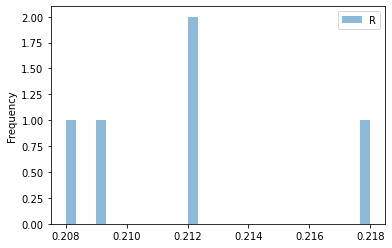

In [4]:
df.plot(kind = 'hist', alpha = 0.5, bins = 30)

In [5]:
df = pd.read_csv('out_pd.csv')
df

,Temperature,Resistance
0,25.5,6.000
1,27.0,6.900
2,29.0,0.000
3,35.0,0.000
4,44.0,6.090
5,53.0,6.190
6,65.0,6.270
7,78.0,6.405
8,90.0,6.492
9,105.0,6.590


In [6]:
import seaborn as sns
df.head()

,Temperature,Resistance
0,25.5,6.00
1,27.0,6.90
2,29.0,0.00
3,35.0,0.00
4,44.0,6.09


<AxesSubplot:xlabel='Temperature', ylabel='Resistance'>

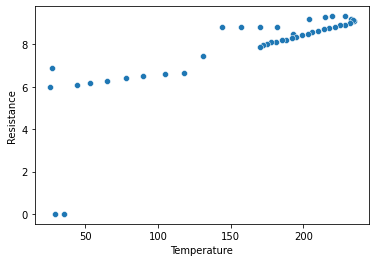

In [7]:
sns.scatterplot(x = df.Temperature, y = df.Resistance)

In [8]:
df.describe()

,Temperature,Resistance
count,43.000000,43.000000
mean,163.034884,7.762791
std,66.942619,2.006345
min,25.500000,0.000000
25%,124.500000,7.165000
50%,185.000000,8.449000
75%,214.500000,8.822500
max,235.000000,9.329000


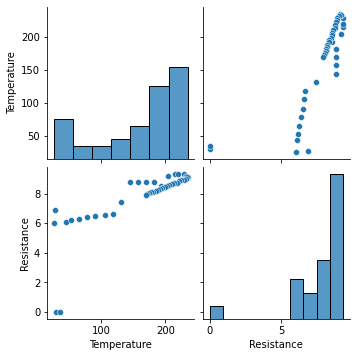

In [9]:
sns.pairplot(data = df)

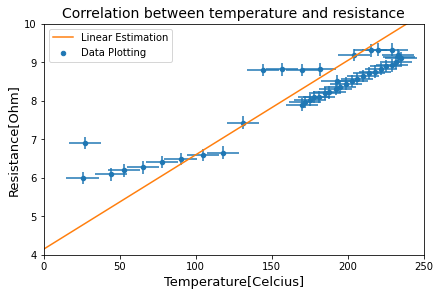

In [10]:
# -*- coding: utf-8 -*-
from pandas import DataFrame, Series
import numpy as np
from numpy.random import randn, rand
from matplotlib.pylab import close
import matplotlib.pyplot as plt 

df = pd.read_csv('out_pd.csv')
df = df[df > 0]
# errors
err_df0 = DataFrame(66.942619/np.sqrt(40), index=range(43), columns=['Temperature', 'Resistance'])
err_df1 =  DataFrame(1.032796/np.sqrt(40), index=range(43), columns=['Temperature', 'Resistance'])

import pandas.util.testing as tm

fig, axes = plt.subplots(constrained_layout = True, facecolor = 'white')
axes.axis([0, 250, 4, 10])

df.plot(kind='scatter', x='Temperature', y='Resistance', xerr=err_df0, yerr=err_df1, ax=axes,label = 'Data Plotting')
axes.set_title('Correlation between temperature and resistance', fontsize = 14)
axes.set_xlabel('Temperature[Celcius]', fontsize = 13)
axes.set_ylabel('Resistance[Ohm]', fontsize = 13)

df2 = df['Temperature'] * df['Resistance']
df22 = pd.DataFrame({'Covariance': df2})
df3 = pd.concat([df, df22], axis = 1)
Cov = df22.mean() - df['Temperature'].mean() * df['Resistance'].mean()
a = Cov / (df['Temperature'].std())**2
b = - a * df['Temperature'].mean() + df['Resistance'].mean()
x1 = np.linspace(0, 250, 100)
l = a.values[0]
k = b.values[0]
y1 = l * x1 + k
axes.plot(x1, y1, label = 'Linear Estimation')
axes.legend()
plt.show()

In [11]:
from sympy import *
x1 = symbols('x')
y1 = symbols('y')
l = a.values[0]
k = b
y1 = l * x1 + k
y1

0.0244873658011095*x + 4.14916857861838